In [1]:
#Importing necessary libaries

import pandas as pd
from keplergl import KeplerGl 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#importing the dataset

df = pd.read_csv('Indian_earthquake_data.csv')
df.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [3]:
#preprocessing dataset

df['Origin Time'] = pd.to_datetime(df['Origin Time'])
df['Place'] = df.apply(lambda x: x['Location'].split(',')[1], axis=1)
df.head()

C:\Users\vishw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place
0,2021-07-31 09:43:23,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",Maharashtra
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",Punjab
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",Haryana
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",Bhutan


In [4]:
haryana = df[df['Place'].str.contains("Haryana")]

In [5]:
date = haryana["Origin Time"].dt.date

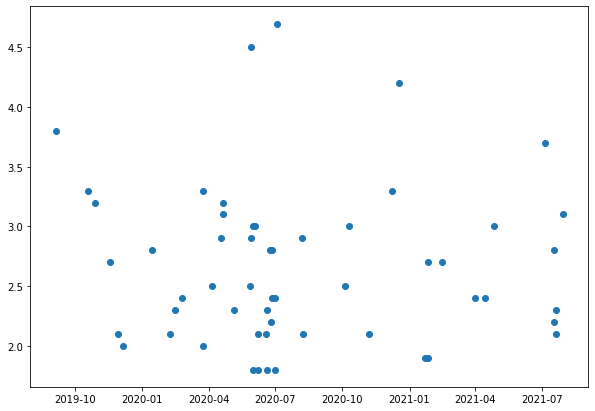

In [6]:
plt.figure(figsize = (10,7))
plot = plt.scatter(date, haryana["Magnitude"])

[' Maharashtra',
 ' Afghanistan',
 ' Arunachal Pradesh',
 ' Assam',
 ' Himachal Pradesh',
 ' Laddakh',
 ' Manipur',
 ' Mizoram',
 ' Andaman and Nicobar island',
 'Maharashtra',
 ' Jammu and Kashmir',
 'Mizoram']

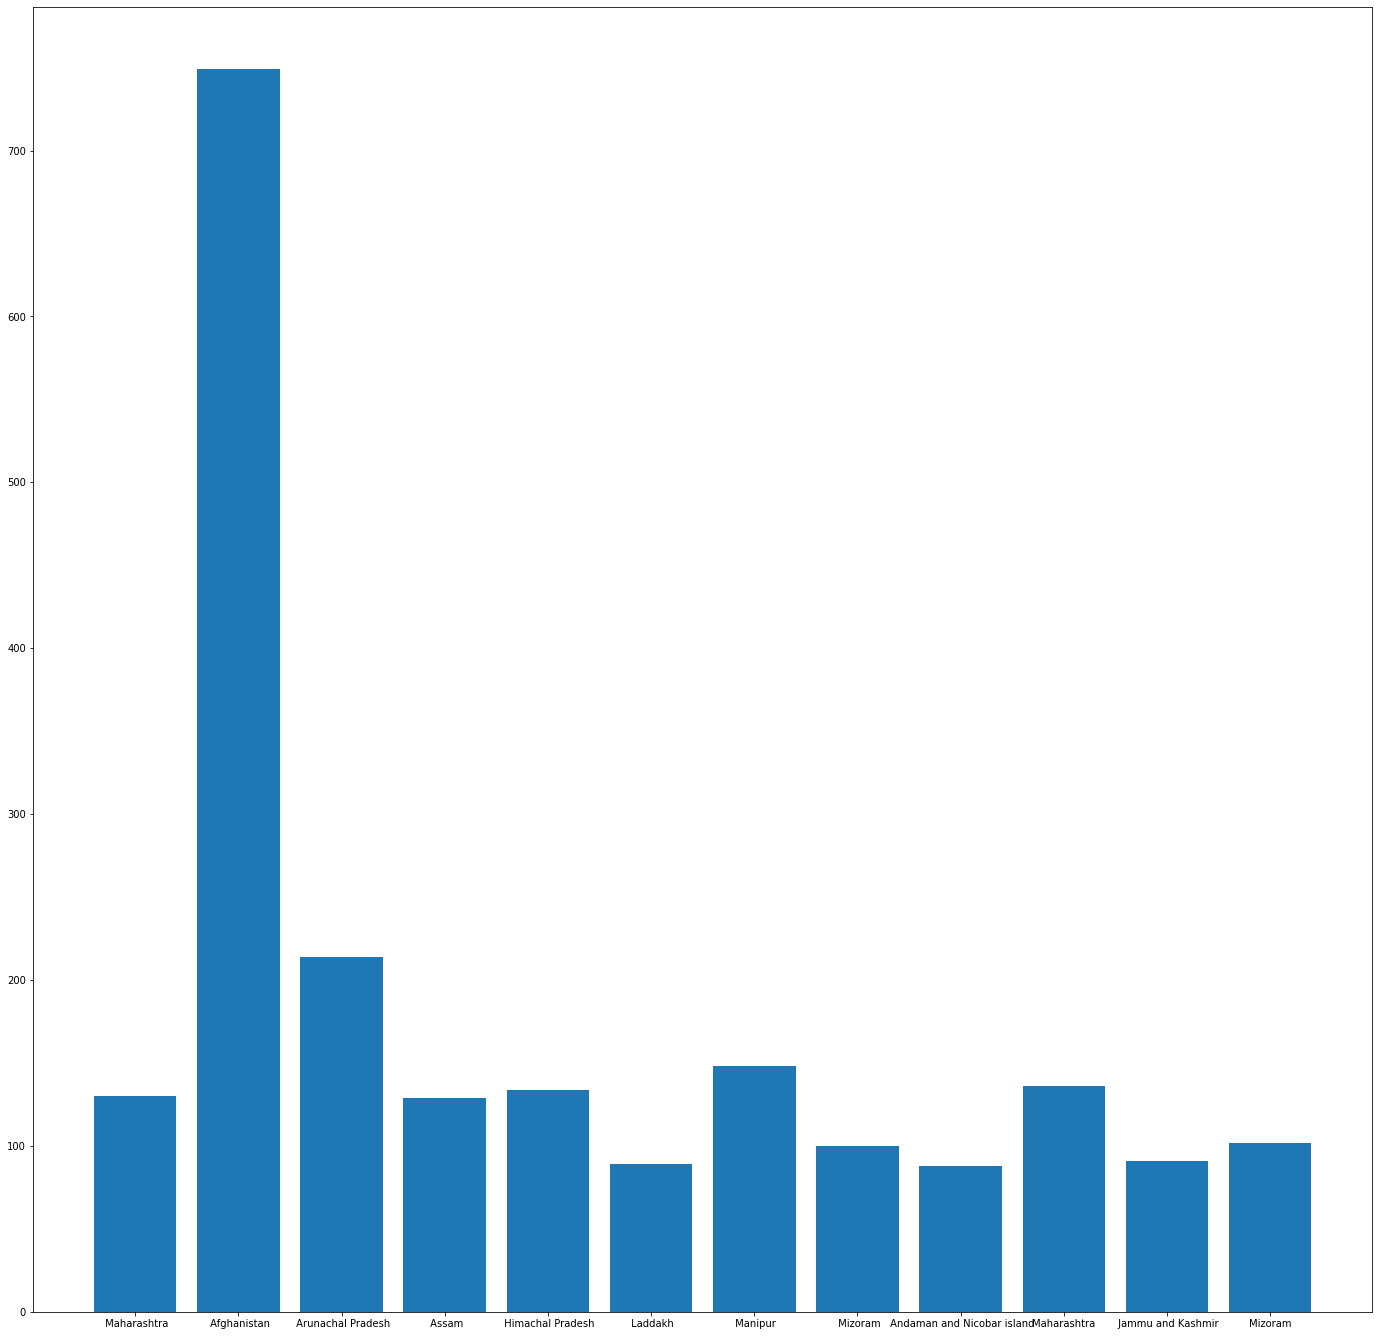

In [7]:
values = []
size = []
indices = []

unique = df["Place"].unique()
unique = np.delete(unique,0)
ulist = unique.tolist()

for _,u in enumerate(unique):
    values.append(df[df['Place'].str.contains(u)])
    if(len(values[_]) > 80):
        size.append(len(values[_]))
    else:
        ulist.remove(u)
    
plt.figure(figsize = (24,24))
plt.bar(ulist,size)
ulist

In [8]:
#Visualizing with Kepler.gl
map_1 = KeplerGl(height=600)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [9]:
map_1.add_data(data=df, name='Indian Earthquake Visualization')
map_1

KeplerGl(data={'Indian Earthquake Visualization': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…